# Line-segment Intersections

A *line-segment* can be described by its two endpoints, $p_1$ and $p_2$, and denoted by $p_1p_2$. Note that the set of points on this segments can be expressed as $p_1 + s(p_2-p_1)$ for a parameter value $s\in[0,1]$.

To determine if $p_1p_2$ intersects another line-segment $q_1q_2$, we express the points on both segments in this way (with different parameters $s,t$), and set the points equal. This leads to the problem: Find $s,t\in[0,1]$ s.t.

$$
p_1 + s(p_2 - p_1) = q_1 + t(q_2 - q_1)
$$

which can be reorganized as a 2-by-2 linear system of equations for $s,t$:

$$
\begin{pmatrix}
p_2 - p_1 & q_1 - q_2
\end{pmatrix}
\begin{pmatrix}
s \\ t
\end{pmatrix} =
\begin{pmatrix}
q_1 - p_1
\end{pmatrix}
$$

If the line-segments are parallel, the matrix is singular. For simplicity we simply say that they do not intersect in this case, but a better implementation would determine if they actually overlap.

We implement the method in the function below, where we have also included a tolerance $\delta$. This is useful to handle the case when the intersection is close to one of the endpoints, then $\delta>0$ would allow for a small positive overlap and $\delta<0$ a small negative overlap.

In [1]:
using LinearAlgebra
using PyPlot
function linesegment_intersect(p1, p2, q1, q2, δ)
    A = [p2-p1 q1-q2]
    b = q1-p1
    if rank(A) == 2
        st = A \ b
        if all(-δ .≤ st .≤ 1 + δ)
            pintersect = p1 + st[1] * (p2 - p1)
            return true, pintersect
        else
            return false, nothing
        end
    else
        # Warning: parallel lines, should check if they actually overlap
        return false, nothing
    end
end

linesegment_intersect (generic function with 1 method)

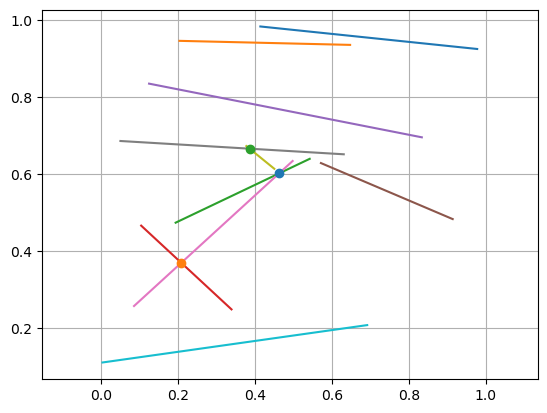

In [2]:
# Example: n random lines, find and plot all intersections
n = 10
lines = [ [rand(2), rand(2)] for i = 1:n ]

# Plot all lines
for line in lines
    plot([line[1][1], line[2][1]], [line[1][2], line[2][2]])
end

# Find all intersections - note that we only consider j>i to avoid checking
# the same 2 line-segments twice
for i = 1:n
    for j = i+1:n
        isect, pq = linesegment_intersect(lines[i][1], lines[i][2], lines[j][1], lines[j][2], 0)
        if isect
            plot(pq[1], pq[2], "o")
        end
    end
end

axis("equal"); grid(true);